In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./pima.csv', header=None)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


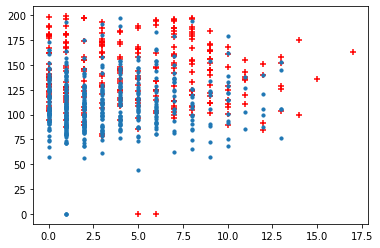

In [22]:
pos, neg = (y==1).reshape(768,1) , (y==0).reshape(768, 1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)

In [23]:
from sklearn.model_selection import train_test_split

X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('X-sk-train size', X_sk_train.size)
print('X-sk-test size', X_sk_test.size)
print('y-sk-train size', y_sk_train.size)
print('y-sk-test size', y_sk_test.size)

X-sk-train size 4296
X-sk-test size 1848
y-sk-train size 537
y-sk-test size 231


In [24]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_sk_train:', np.bincount(y_sk_train))
print('Labels counts in y_sk_test:', np.bincount(y_sk_test))

Labels counts in y: [500 268]
Labels counts in y_sk_train: [350 187]
Labels counts in y_sk_test: [150  81]


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_sk_train)
X_sk_train_std = sc.transform(X_sk_train)
X_sk_test_std = sc.transform(X_sk_test)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_sk_train_std, y_sk_train)
alpha = model.intercept_
betas = model.coef_
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.88616415]
betas = [[ 0.49618934  1.04833091 -0.29150238 -0.0220156   0.01579886  0.69694845
   0.35172734  0.19811429]]


In [27]:
y_sk_pred = lr.predict(X_sk_test_std)
print('Misclassified samples: %d' % (y_sk_test != y_sk_pred).sum())

Misclassified samples: 55


In [28]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_sk_test, y_sk_pred)
print(cm)

[[133  17]
 [ 38  43]]


In [29]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_sk_test, y_sk_pred))

Accuracy: 0.76


In [30]:
from sklearn.metrics import classification_report 
print(classification_report(y_sk_test, y_sk_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.72      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [31]:
print('Accuracy: %.2f' % lr.score(X_sk_test_std, y_sk_test))

Accuracy: 0.76


In [33]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

# testing the sigmoid function
sigmoid(0)

0.5

In [37]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

In [36]:

def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [38]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.6931471805599447
Gradient at initial theta (zeros): [[ 0.15104167]
 [-0.1057657 ]
 [-0.22239171]
 [-0.03101423]
 [-0.03562996]
 [-0.06222448]
 [-0.13951021]
 [-0.08286117]
 [-0.11361018]]


In [39]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [40]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[-0.87110175]
 [ 0.41480205]
 [ 1.12354383]
 [-0.25717844]
 [ 0.00986742]
 [-0.13724672]
 [ 0.70675625]
 [ 0.31296113]
 [ 0.17474906]]
The cost of the optimized theta: 0.47099308448839083


Text(0.5, 1.0, 'Cost function using Gradient Descent')

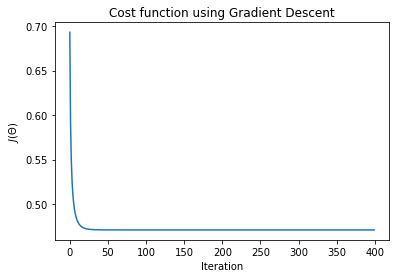

In [41]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

No handles with labels found to put in legend.


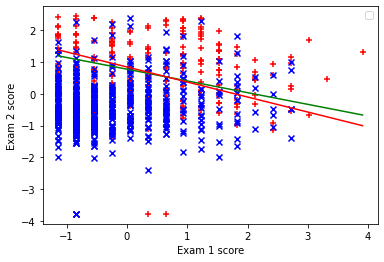

In [42]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
y_sk_value = -(model.intercept_+model.coef_[0,0]*x_value)/model.coef_[0,1]
plt.plot(x_value,y_value, "g")
plt.plot(x_value,y_sk_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

In [43]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [44]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 601 %
